In [1]:
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt

In [19]:
image_ids = pd.read_csv("./gold_data_ids.txt", header=None, names=['image_id'])
image_ids = image_ids.image_id.values

In [20]:
image_ids

array(['APF0000l1r', 'APF00002m8', 'APF0000169', 'APF0000kxr',
       'APF000035u', 'APF0000kou', 'APF0000je9', 'APF0000j3d',
       'APF000028j', 'APF0000k8a', 'APF0000jnp', 'APF0000l1z',
       'APF00002uo', 'APF0000jzw', 'APF00002aj', 'APF0000g19',
       'APF00001lb', 'APF00006uo', 'APF0000dcs', 'APF0000gpu',
       'APF00008eb', 'APF0000fqm', 'APF00008q9', 'APF00007xp',
       'APF0000h3f', 'APF00009m3', 'APF00003kc', 'APF0000170',
       'APF0000gr8', 'APF0000bsn', 'APF00004wr', 'APF000032b',
       'APF0000c0t', 'APF00002f0', 'APF0000eoh', 'APF000007c',
       'APF000081c', 'APF0000fj8'], dtype=object)

In [21]:
datapath='gold_comparison'

In [22]:
from planet4 import markings, clustering, gold_standard_checker, gold_standard_plotter, io

In [6]:
len(image_ids)

38

In [26]:
from pathlib import Path
from planet4 import plotting

def plot_gold_comparison(id_, datapath):
    fig, axes = plt.subplots(2, 2, figsize=(8, 5))
    axes = axes.ravel()
    fig.suptitle(id_)
    plotting.plot_finals(id_, datapath, axes[0])
    axes[0].set_title(f'Final objects.')
    imgid = markings.ImageID(id_)
    for ax, member in zip(axes[1:], markings.gold_members[:]):
        ax.set_title(member)
        for kind in ['fan', 'blotch']:
            imgid.plot_markings(kind, ax=ax, user_name=member)
    fig.savefig(f"plots/gold_member_comparisons/{id_}_gold_comparison.png", dpi=150)
    plt.close('all')

In [27]:
savedir = Path('plots/gold_member_comparisons')
savedir.mkdir(exist_ok=True, parents=True)
catalog = 'gold_comparison'

for id_ in image_ids:
    plot_gold_comparison(id_, datapath=catalog)

Some files not found.
Some files not found.
Some files not found.
Some files not found.
Some files not found.
Some files not found.
Some files not found.
Some files not found.
Some files not found.
Some files not found.
Some files not found.
Some files not found.
Some files not found.
Some files not found.
Some files not found.
Some files not found.
Some files not found.
Some files not found.
Some files not found.
Some files not found.
Some files not found.
Some files not found.
Some files not found.
Some files not found.
Some files not found.
Some files not found.
Some files not found.
Some files not found.
Some files not found.


In [7]:
db = io.DBManager()

In [8]:
data = db.get_image_id_markings('bsn')

In [9]:
data.filter(regex='tile').drop_duplicates()

,x_tile,y_tile
2364461,1,47


In [11]:
data.filter(regex='image_name').drop_duplicates()

,image_name
2364461,ESP_012076_0945


In [13]:
from planet4 import plotting, markings

In [14]:
imgid = markings.ImageID('bsn')

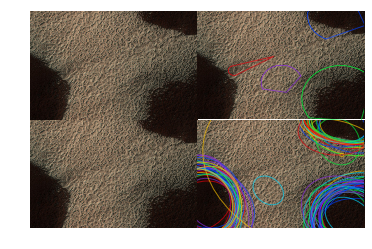

In [15]:
imgid.plot_all()

In [17]:
fig, ax = plt.subplots()
plotting.plot_finals('bsn', datapath=datapath, ax=ax)

Some files not found.


In [18]:
plotting.plot_clustered_blotches('bsn', datapath=datapath)

Clustered blotchfile not found:  /Users/klay6683/Dropbox/data/planet4/gold_comparison/ESP_012076_0945/APF0000bsn/L1A/APF0000bsn_L1A_blotches.csv


In [61]:
pm = io.PathManager(image_ids[0])

In [62]:
pm.final_blotchfile.exists()

False

In [44]:
io.check_and_pad_id(image_ids.iloc[0])

image_id    APF000000APF0000l1r
Name: 0, dtype: object

In [46]:
io.check_and_pad_id('l1r')

'APF0000l1r'

In [45]:
image_ids.iloc[0]

image_id    APF0000l1r
Name: 0, dtype: object

In [32]:
def check_and_pad_id(imgid):
    if imgid is None:
        return None
    imgid_template = "APF0000000"
    if len(imgid) < len(imgid_template):
        imgid = imgid_template[:-len(imgid)] + imgid
    return imgid


In [30]:
check_and_pad_id()

10
10


'APF0000l1r'

In [ ]:
savedir = Path('plots/gold_member_comparisons')
savedir.mkdir(exist_ok=True, parents=True)
catalog = 'catalog_1.0b'

for i,apfid in enumerate(apfids):
    print(100*i/len(apfids))
    pm = io.PathManager(id_=apfid, datapath=catalog)
    imgid = markings.ImageID(id_, scope='planet4')
    
    for kind in ['fan', 'blotch']:
        fig, axes = plt.subplots(2, 2, figsize=(10,8))
        axes = axes.ravel()
        fig.suptitle(apfid+' '+kind)
        imgid.plot_markings(kind, data=getattr(pm, f"final{kind}df"), with_center=True)
        axes[0].set_title(f'Final {kind} objects.')
        for goldstar, ax in zip(markings.gold_members[:3], axes[1:]):
            func(ax=ax, user_name=goldstar)
            ax.set_title(goldstar)
        fname = "{number}_{apfid}_{kind}.png".format(number=str(i).zfill(2),
                                                     apfid=apfid,
                                                     kind=func.__name__.split('_')[1])
        plt.savefig(savepath+fname, dpi=150)
        plt.close(fig)